In [1]:
# Description: This program uses artificial neural network called Long Short Term Memory (LSTM)
# to predict closing stock price of a corporation (Apple Inc.) using past 60 day stock price.

In [2]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [3]:
import yfinance as yf
data = yf.download(tickers= "AAPL", start='2012-01-01', end='2019-12-17')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433823,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500646,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639429,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771558,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751303,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.307129,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.864159,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.031998,137310400


In [4]:
# Get the number of columns and rows in the dataset
data.shape

(2002, 6)

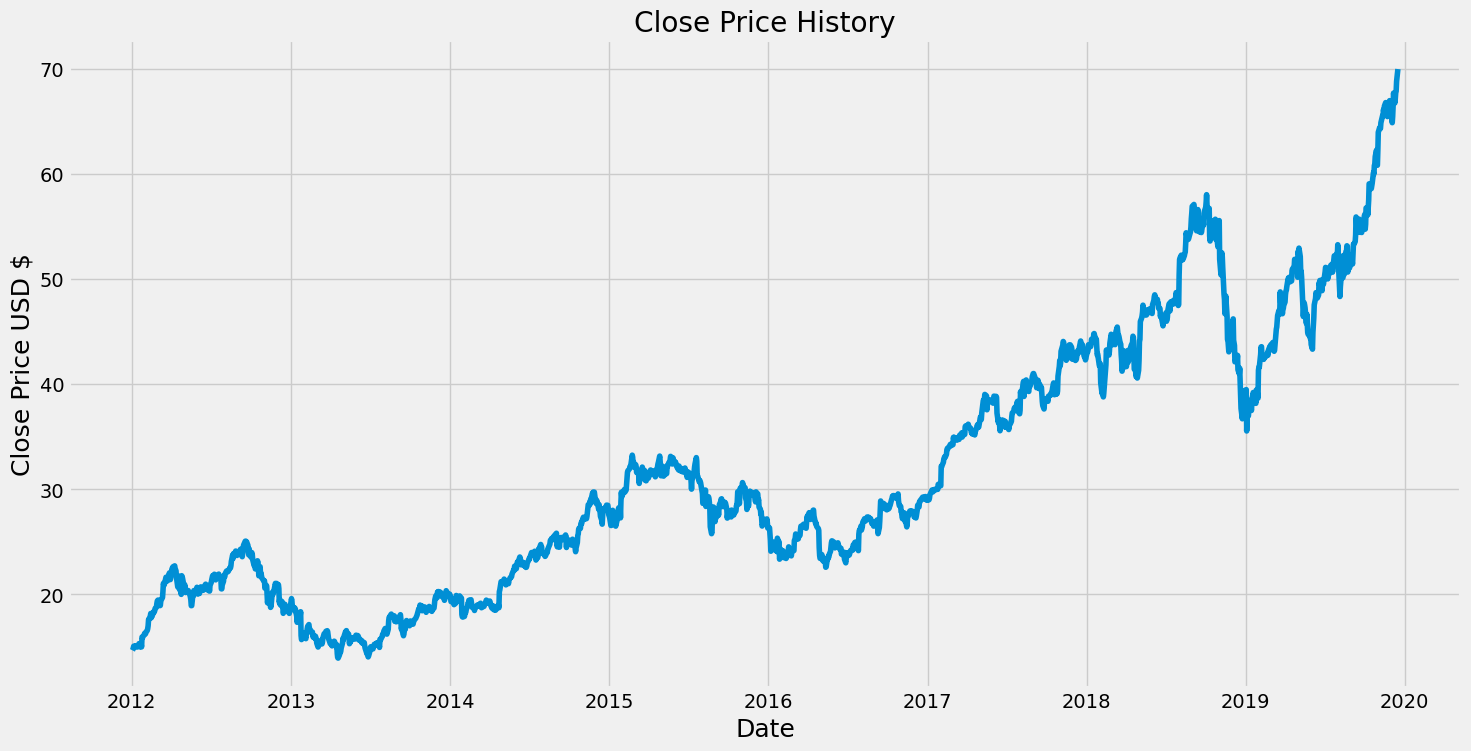

In [5]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title("Close Price History")
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.show()

In [6]:
# Create a dataframe with only the Close column
data = data.filter(['Close'])
# Convert the dataframe to numpy array
close = data.values
# Get the number of rows to train the model on
training_data_length = math.ceil(len(close) * 0.8)
training_data_length

1602

In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close)

scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [8]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_length]

# Split the data into xtrain and ytrain datasets
xtrain = []
ytrain = []

for i in range(60, len(train_data)):
  xtrain.append(train_data[i-60:i, 0])
  ytrain.append(train_data[i, 0])
  if i<=60:
    print(xtrain)
    print(ytrain)
    print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]



In [9]:
# Convert the xtrain and ytrain to numpy array
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [10]:
# Reshape the data
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
xtrain.shape

(1542, 60, 1)

In [68]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [69]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [70]:
# Train the model
model.fit(xtrain, ytrain, batch_size=1, epochs=1)

1542/1542 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - loss: 0.0033


In [71]:
# Create a testing dataset
# Create a new array containing scaled values from index 1542 to 2002
test_data = scaled_data[training_data_length - 60:, :]
# Create the data sets xtest and ytest
xtest = []
ytest = close[training_data_length:, :]

for i in range(60, len(test_data)):
  xtest.append(test_data[i-60:i, 0])

In [72]:
# Convert the data to a numpy array
xtest = np.array(xtest)

In [73]:
# Reshape the data
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

In [74]:
# Get the model predicted price values
predictions = model.predict(xtest)
predictions = scaler.inverse_transform(predictions)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [75]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-ytest)**2)
rmse

0.264433479309082

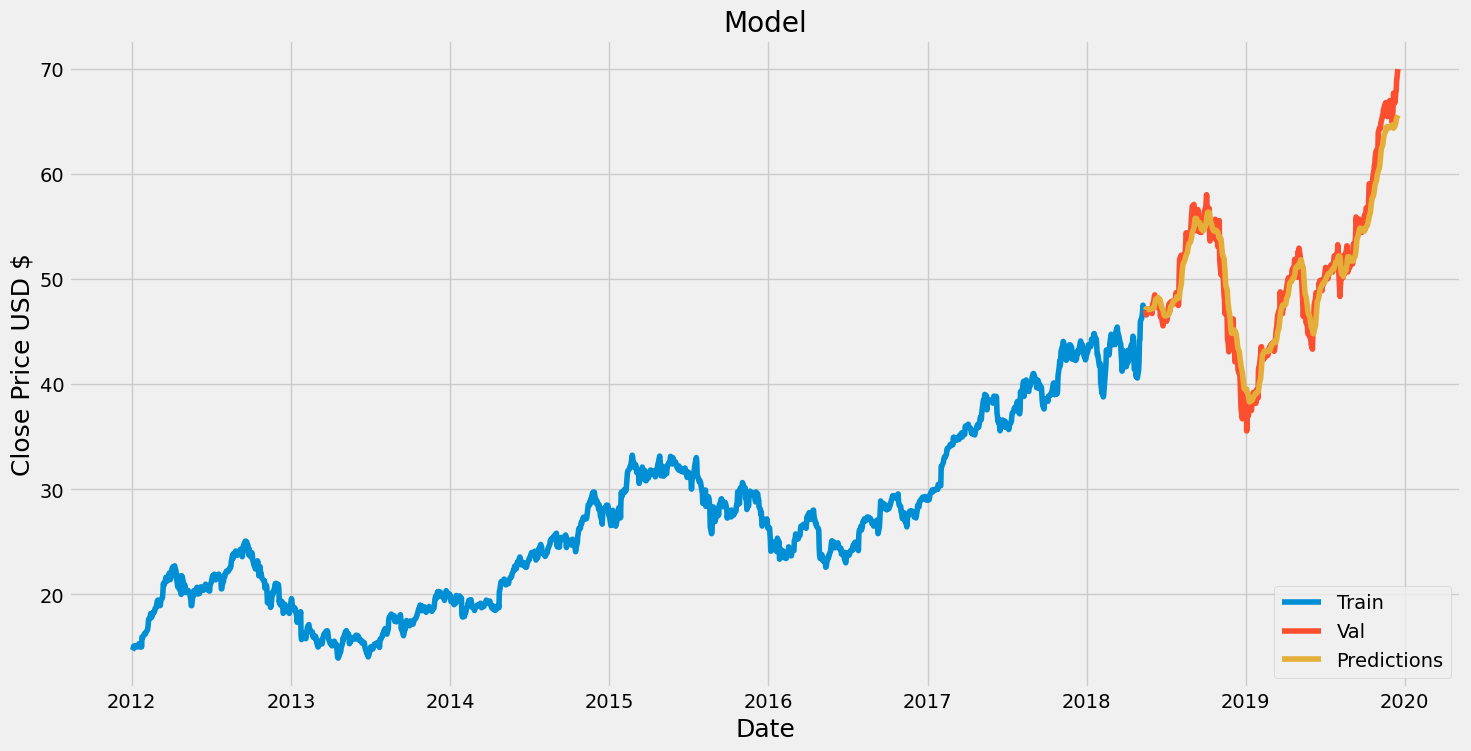

In [76]:
# Plot the data
train = data[:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD $", fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [77]:
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,47.057095
2018-05-17,46.747501,47.160980
2018-05-18,46.577499,47.183674
2018-05-21,46.907501,47.144115
2018-05-22,46.790001,47.113281
...,...,...
2019-12-10,67.120003,64.655685
2019-12-11,67.692497,64.821373
2019-12-12,67.864998,65.037407


In [78]:
# Get the quote
apple_quote = yf.download(tickers= "AAPL", start='2012-01-01', end='2019-12-17')
# Create a new Dataframe
new_df = apple_quote.filter(["Close"])
# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price[0][0])

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
66.01282


In [87]:
# Get the quote
apple_quote = yf.download(tickers= "AAPL", start='2019-12-17', end='2019-12-19')
apple_quote["Close"].values

[*********************100%%**********************]  1 of 1 completed


array([70.10250092, 69.93499756])

In [93]:
from tensorflow.keras.models import load_model, save_model

save_model(model, 'stockprice.h5')

AttributeError: Can't pickle local object 'Layer._initializer_tracker.<locals>.<lambda>'